In [1]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.datasets import fetch_california_housing

# récupération des données
housing = fetch_california_housing(as_frame=True, data_home=".")

X, y = housing.data, housing.target

# Cheatsheet : faire une régression linéaire en Python avec sklearn ? 

Nous avons vu dans le premier module de ML l'intérêt de normaliser les données avant d'appliquer un modèle de régression linéaire : sans modifier la performance du modèle, cela permet d'avoir des coefficients comparables entre eux.

Sklearn permet de faire cela très facilement avec les *pipelines* : elles permettent de chaîner plusieurs étapes de traitement des données et d'entraînement du modèle en une seule ligne de code.

## Lasso

In [2]:
from sklearn.linear_model import Lasso

In [3]:
# instantiation de la pipeline en deux étapes :
# d'abord le scaling puis le Lasso

num_col = X.select_dtypes(include = "number").columns.tolist()
num_encoder = StandardScaler()

cat_col = X.select_dtypes(include = "object").columns.tolist()
cat_encoder = OneHotEncoder()

preprocessor = ColumnTransformer(
    transformers=[
    ("cat", cat_encoder, cat_col),
    ("num", num_encoder, num_col)
]

)

preprocessor.fit(X)
ohe = preprocessor.named_transformers_["cat"]
ohe_cols = list(ohe.get_feature_names_out(cat_col)) if len(cat_col)>0 else []
feature_names = ohe_cols + num_col

pipeline = make_pipeline(preprocessor, Lasso(alpha = 0.01))

pipeline

,steps,"[('columntransformer', ...), ('lasso', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cat', ...), ('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


Une fois la pipeline créée, on peut l'utiliser comme un modèle classique : on peut l'entraîner avec la méthode `fit` et faire des prédictions avec la méthode `predict`. On peut l'afficher pour voir les différentes étapes qu'elle contient et si elle a été entraînée ou non.

In [4]:
pipeline.fit(X, y)

,steps,"[('columntransformer', ...), ('lasso', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cat', ...), ('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [5]:
from sklearn.metrics import r2_score

y_pred = pipeline.predict(X)

# évaluation avec le score r2
r2_score(y_true=y, y_pred=y_pred)

0.6021340350040431

Chaque élément de la pipeline peut être accédé individuellement via l'attribut `named_steps`, ce qui permet d'examiner les paramètres ou les résultats intermédiaires de chaque étape.

In [6]:
pipeline.named_steps

{'columntransformer': ColumnTransformer(transformers=[('cat', OneHotEncoder(), []),
                                 ('num', StandardScaler(),
                                  ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms',
                                   'Population', 'AveOccup', 'Latitude',
                                   'Longitude'])]),
 'lasso': Lasso(alpha=0.01)}

In [7]:
import numpy as np
lasso_coef = pipeline.named_steps["lasso"].coef_

nonzero_count = np.sum(np.abs(lasso_coef) > 1e-8)

print("Lasso non-zero coefficients:", int(nonzero_count), "out of", len(feature_names))


Lasso non-zero coefficients: 7 out of 8


In [8]:
pipeline[-1]

,alpha,0.01
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,1000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [9]:
pipeline[-1].coef_

array([ 0.77722333,  0.12486709, -0.12940585,  0.16912537, -0.        ,
       -0.02944551, -0.79543737, -0.75899738])

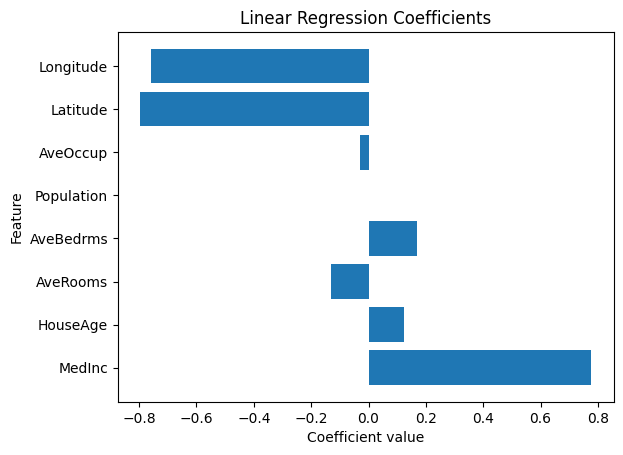

In [10]:
# plot des coefficients de la régression
import matplotlib.pyplot as plt

plt.barh(housing.feature_names, pipeline[-1].coef_)
plt.xlabel("Coefficient value")
plt.ylabel("Feature")
plt.title("Linear Regression Coefficients")
plt.show()

## Ridge

In [11]:
from sklearn.linear_model import Ridge
pipeline = make_pipeline(StandardScaler(), Ridge(alpha = 0.01))

pipeline

,steps,"[('standardscaler', ...), ('ridge', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,alpha,0.01
,fit_intercept,True
,copy_X,True
,max_iter,None


In [12]:
pipeline.fit(X, y)

,steps,"[('standardscaler', ...), ('ridge', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,alpha,0.01
,fit_intercept,True
,copy_X,True
,max_iter,None


In [13]:
from sklearn.metrics import r2_score

y_pred = pipeline.predict(X)

# évaluation avec le score r2
r2_score(y_true=y, y_pred=y_pred)

0.6062326851954261

In [14]:
pipeline[-1].coef_

array([ 0.82961904,  0.1187523 , -0.26552558,  0.30569451, -0.00450277,
       -0.0393263 , -0.89987946, -0.87053475])

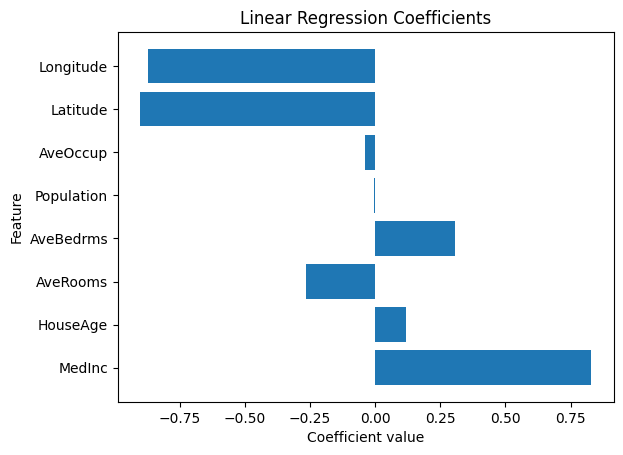

In [15]:
# plot des coefficients de la régression
import matplotlib.pyplot as plt

plt.barh(housing.feature_names, pipeline[-1].coef_)
plt.xlabel("Coefficient value")
plt.ylabel("Feature")
plt.title("Linear Regression Coefficients")
plt.show()

## ElasticNet with preprocessor

In [16]:
# instantiation de la pipeline en deux étapes :
# d'abord le scaling puis le Lasso
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

pipeline = make_pipeline(StandardScaler(), ElasticNet(alpha = 0.1, l1_ratio=0.001))

pipeline

,steps,"[('standardscaler', ...), ('elasticnet', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,alpha,0.1
,l1_ratio,0.001
,fit_intercept,True
,precompute,False


In [17]:
pipeline.fit(X, y)

,steps,"[('standardscaler', ...), ('elasticnet', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,alpha,0.1
,l1_ratio,0.001
,fit_intercept,True
,precompute,False


In [18]:
from sklearn.metrics import r2_score

y_pred = pipeline.predict(X)

# évaluation avec le score r2
r2_score(y_true=y, y_pred=y_pred)

0.569766784038937

In [19]:
pipeline[-1]

,alpha,0.1
,l1_ratio,0.001
,fit_intercept,True
,precompute,False
,max_iter,1000
,copy_X,True
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [20]:
pipeline[-1].coef_

array([ 0.73391407,  0.15660648, -0.0798701 ,  0.09547762,  0.00911954,
       -0.03790563, -0.40616235, -0.367955  ])

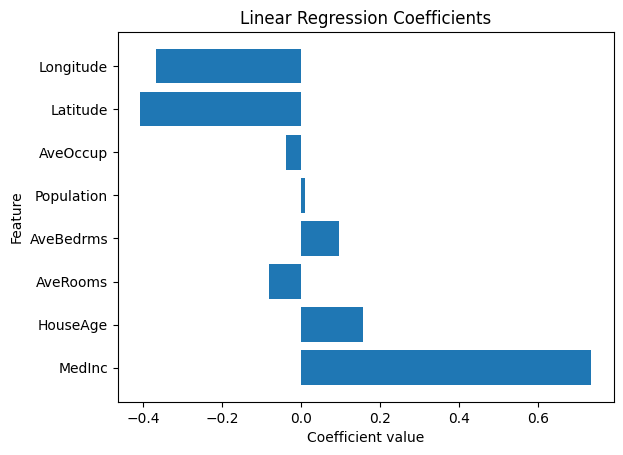

In [21]:
# plot des coefficients de la régression
import matplotlib.pyplot as plt

plt.barh(housing.feature_names, pipeline[-1].coef_)
plt.xlabel("Coefficient value")
plt.ylabel("Feature")
plt.title("Linear Regression Coefficients")
plt.show()